# Group 3 - Ssanidhya Barraptay, Nikhil Bhosale, Pooja Bendale

## H1B Prediction 

In [1]:
#import all the necessary libraries 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [2]:
#read the csv.file
df = pd.read_csv("h1b_kaggle.csv",index_col=0)

In [3]:
df

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...
3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550


In [4]:
df.shape

(3002458, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002458 entries, 1 to 3002458
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CASE_STATUS         object 
 1   EMPLOYER_NAME       object 
 2   SOC_NAME            object 
 3   JOB_TITLE           object 
 4   FULL_TIME_POSITION  object 
 5   PREVAILING_WAGE     float64
 6   YEAR                float64
 7   WORKSITE            object 
 8   lon                 float64
 9   lat                 float64
dtypes: float64(4), object(6)
memory usage: 252.0+ MB


In [6]:
## 2.1 Data Exploration

In [7]:
df.isnull().sum()

CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [8]:
df.CASE_STATUS.value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [9]:
case_status = {
   'CASE_STATUS': {
      r'(PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED|REJECTED|INVALIDATED)':'DENIED',
      r'CERTIFIED-WITHDRAWN': 'CERTIFIED'}
}
df.replace(case_status, regex=True, inplace=True)

# drop rows with 'WITHDRAWN' value 
indexNames = df[df['CASE_STATUS']=='WITHDRAWN'].index
df.drop(indexNames , inplace=True)

In [10]:
df.CASE_STATUS.value_counts()

CERTIFIED    2818282
DENIED         94364
Name: CASE_STATUS, dtype: int64

# Plotting the Data

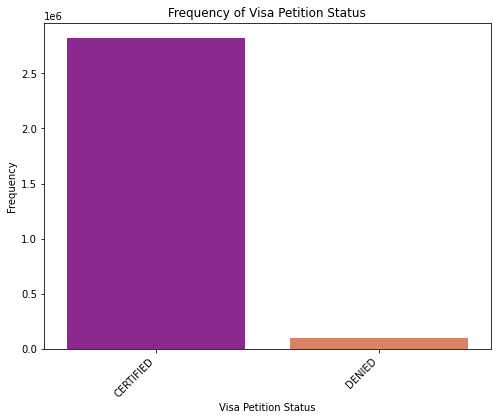

In [11]:
plt.figure(figsize=(8, 6))

# Get the value counts for CASE_STATUS and plot a bar chart
status_counts = df['CASE_STATUS'].value_counts()
ax = sns.barplot(x=status_counts.index, y=status_counts, palette='plasma')

# Set axis labels and plot title
ax.set(xlabel='Visa Petition Status', ylabel='Frequency', title='Frequency of Visa Petition Status')

# Rotate the x-tick labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()

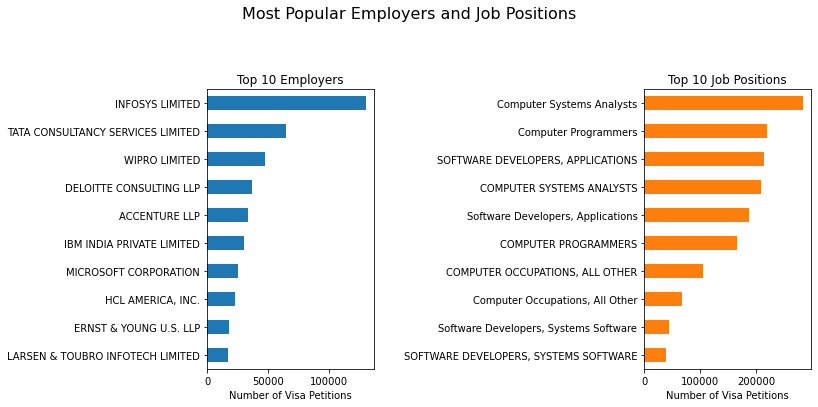

In [12]:
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot horizontal bar charts of top 10 employers and job positions
df.EMPLOYER_NAME.value_counts().head(10).sort_values().plot(kind='barh', ax=axs[0], color='tab:blue')
axs[0].set(title='Top 10 Employers', xlabel='Number of Visa Petitions')
df.SOC_NAME.value_counts().head(10).sort_values().plot(kind='barh', ax=axs[1], color='tab:orange')
axs[1].set(title='Top 10 Job Positions', xlabel='Number of Visa Petitions')

# Set common ylabel and adjust subplot spacing
fig.suptitle('Most Popular Employers and Job Positions', fontsize=16)
fig.tight_layout(pad=3.0)

# Display the plot
plt.show()

In [13]:
# Analyzing the wage column
df['PREVAILING_WAGE'].describe()

count    2.912593e+06
mean     1.428910e+05
std      5.282312e+06
min      0.000000e+00
25%      5.441300e+04
50%      6.500000e+04
75%      8.143200e+04
max      6.997607e+09
Name: PREVAILING_WAGE, dtype: float64

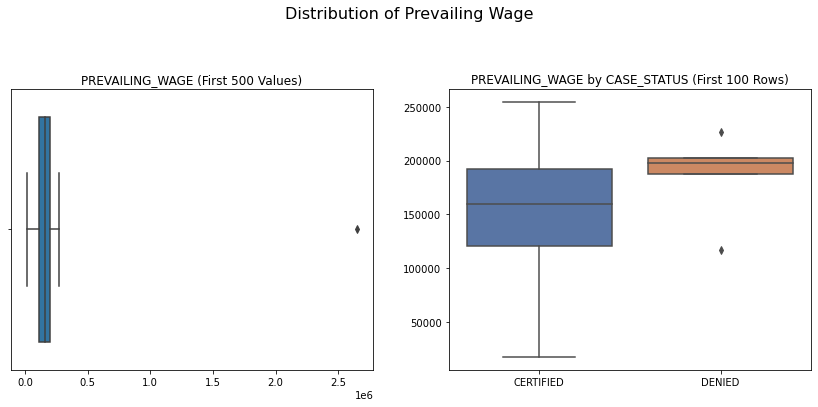

In [14]:
# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# plot a boxplot of the 'PREVAILING_WAGE' column in the first subplot
sns.boxplot(x=df.head(500)['PREVAILING_WAGE'], ax=axs[0], color='tab:blue')
axs[0].set(title='PREVAILING_WAGE (First 500 Values)', xlabel='')

# plot a boxplot of the 'PREVAILING_WAGE' column grouped by 'CASE_STATUS' in the second subplot
sns.boxplot(x='CASE_STATUS', y='PREVAILING_WAGE', data=df.head(100), palette='deep', ax=axs[1])
axs[1].set(title='PREVAILING_WAGE by CASE_STATUS (First 100 Rows)', xlabel='', ylabel='')

# Set common y-label and adjust subplot spacing
fig.suptitle('Distribution of Prevailing Wage', fontsize=16)
fig.tight_layout(pad=3.0)

# show the plot
plt.show()


In [15]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

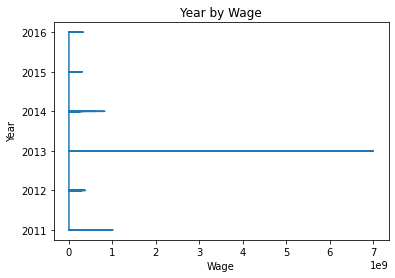

In [16]:
plt.plot(df['PREVAILING_WAGE'], df['YEAR'])

# Add labels and title to the plot
plt.xlabel('Wage')
plt.ylabel('Year')
plt.title('Year by Wage')

# Show the plot
plt.show()

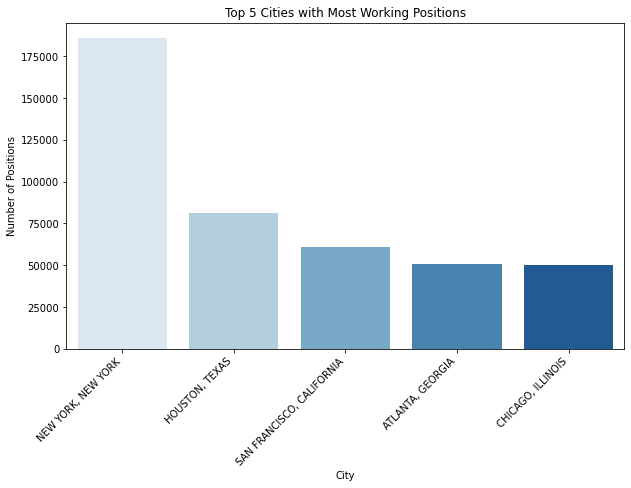

In [17]:
plt.figure(figsize=(10, 6))

# Get the top 5 city counts and plot a bar chart
top_cities = df.WORKSITE.value_counts().head(5)
ax = sns.barplot(x=top_cities.index, y=top_cities, palette='Blues')

# Set axis labels and plot title
ax.set(xlabel='City', ylabel='Number of Positions', title='Top 5 Cities with Most Working Positions')

# Rotate the x-tick labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()

## Data Preprocessing

In [18]:
df.SOC_NAME

1          BIOCHEMISTS AND BIOPHYSICISTS
2                       CHIEF EXECUTIVES
3                       CHIEF EXECUTIVES
4                       CHIEF EXECUTIVES
6                       CHIEF EXECUTIVES
                       ...              
3002454                              NaN
3002455                              NaN
3002456                              NaN
3002457                              NaN
3002458                              NaN
Name: SOC_NAME, Length: 2912659, dtype: object

In [19]:
df.isna().sum()

CASE_STATUS               13
EMPLOYER_NAME             31
SOC_NAME               17086
JOB_TITLE                 23
FULL_TIME_POSITION        14
PREVAILING_WAGE           66
YEAR                      13
WORKSITE                   0
lon                   102844
lat                   102844
dtype: int64

In [20]:
# Dropping job title ,lat and lon as these columns are not useful

In [21]:
df.drop('JOB_TITLE',inplace=True,axis=1)
df.drop('lon',inplace=True,axis=1)
df.drop('lat',inplace=True,axis=1)

In [22]:
df.isna().sum()

CASE_STATUS              13
EMPLOYER_NAME            31
SOC_NAME              17086
FULL_TIME_POSITION       14
PREVAILING_WAGE          66
YEAR                     13
WORKSITE                  0
dtype: int64

In [23]:
df['CASE_STATUS'].value_counts()

CERTIFIED    2818282
DENIED         94364
Name: CASE_STATUS, dtype: int64

In [24]:
# AS we can see our certified and denied cases are imbalanced ,we have more certified values than denied

In [25]:
# Calculating imbalance ratio between certified and denied classes

certified_count = 2818282

denied_count = 94364

imbalance_ratio = certified_count/ denied_count

print("The imbalance ratio is ",imbalance_ratio)

The imbalance ratio is  29.86607180704506


In [26]:
# This means that the number of certified cases is around 30 times higher than the number of denied cases, indicating a highly imbalanced dataset.

In [27]:
# We will use downsampling technique to balance the case_status

from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['CASE_STATUS'] == 'CERTIFIED']
df_minority = df[df['CASE_STATUS'] == 'DENIED']

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),    # match minority class size
                                   random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(df_downsampled['CASE_STATUS'].value_counts())

CERTIFIED    94364
DENIED       94364
Name: CASE_STATUS, dtype: int64


In [28]:
df_downsampled

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
2052448,CERTIFIED,SAN DIEGO COUNTY CREDIT UNION,"Software Developers, Applications",Y,83075.00,2013.0,"SAN DIEGO, CALIFORNIA"
1227785,CERTIFIED,"IT TRAILBLAZERS, LLC","COMPUTER OCCUPATIONS, ALL OTHER",Y,43742.00,2015.0,"MENOMONEE FALLS, WISCONSIN"
1336620,CERTIFIED,"HEALTH RESEARCH, INC.","Life Scientists, All Other",Y,52502.06,2014.0,"ALBANY, NEW YORK"
1406506,CERTIFIED,"CYNOSURE TECHNOLOGIES, LLC",Computer Systems Analysts,Y,56680.00,2014.0,"HOUSTON, TEXAS"
2183048,CERTIFIED,EMC CORPORATION,"Software Developers, Applications",Y,100027.00,2013.0,"HOPKINTON, MASSACHUSETTS"
...,...,...,...,...,...,...,...
3002370,DENIED,"CUSTOMTBT, LLC",Instructional Coordinators,Y,46738.00,2011.0,"MARIETTA, GEORGIA"
3002379,DENIED,"KEVIN PARK & ASSOCIATES, LTD",Accountants and Auditors,Y,45760.00,2011.0,"ARLINGTON HEIGHTS, ILLINOIS"
3002384,DENIED,IVERTIX INCORPORATED,Computer Programmers,Y,54080.00,2011.0,"WASHINGTON, DISTRICT OF COLUMBIA"
3002390,DENIED,"PROGRESSIVE SURFACE, INC.",Sales Engineers,Y,55141.00,2011.0,"GRAND RAPIDS, MICHIGAN"


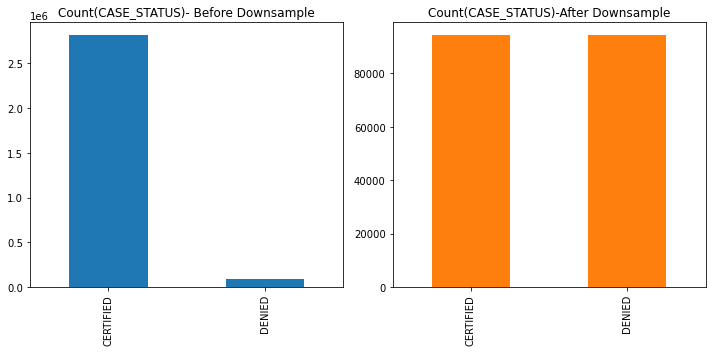

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Define color scheme for bar graph
colors = ['#1f77b4', '#ff7f0e']

# Plot bar chart of 'CASE_STATUS' before downsampling
df['CASE_STATUS'].value_counts().plot(kind='bar', ax=axs[0], color=colors[0])
axs[0].set_title('Count(CASE_STATUS)- Before Downsample')

# Plot bar chart of 'CASE_STATUS' after downsampling
df_downsampled.CASE_STATUS.value_counts().plot(kind='bar', ax=axs[1], color=colors[1])
axs[1].set_title('Count(CASE_STATUS)-After Downsample')

# Add spacing between subplots and display plot
plt.tight_layout()
plt.show()

In [30]:
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188728 entries, 2052448 to 3002393
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CASE_STATUS         188728 non-null  object 
 1   EMPLOYER_NAME       188721 non-null  object 
 2   SOC_NAME            187621 non-null  object 
 3   FULL_TIME_POSITION  188727 non-null  object 
 4   PREVAILING_WAGE     188675 non-null  float64
 5   YEAR                188728 non-null  float64
 6   WORKSITE            188728 non-null  object 
dtypes: float64(2), object(5)
memory usage: 11.5+ MB


C:\Users\parth\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='PREVAILING_WAGE'>

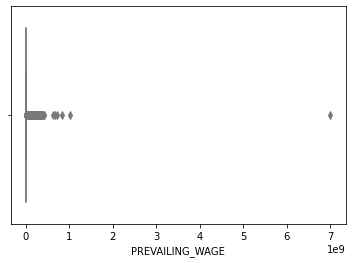

In [31]:
#Now we have one float variable other than year which is prevailing wage ,checking if there are any ourtliers present in this code

sns.boxplot(x=df['PREVAILING_WAGE'], orient='v', color='lightblue', fliersize=5)


<AxesSubplot:xlabel='PREVAILING_WAGE'>

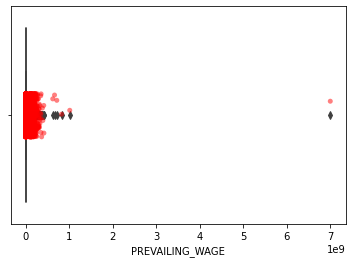

In [32]:
# calculate the interquartile range (IQR) of the 'PREVAILING_WAGE' column
Q1 = df_downsampled['PREVAILING_WAGE'].quantile(0.25)
Q3 = df_downsampled['PREVAILING_WAGE'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers as values that fall outside the IQR range
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = df_downsampled[(df_downsampled['PREVAILING_WAGE'] < lower_limit) | (df_downsampled['PREVAILING_WAGE'] > upper_limit)]

# plot a boxplot of the 'PREVAILING_WAGE' column with outliers highlighted
sns.boxplot(x=df_downsampled['PREVAILING_WAGE'])
sns.stripplot(x=outliers['PREVAILING_WAGE'], color='red', alpha=0.5)

In [33]:
Q1 = df_downsampled['PREVAILING_WAGE'].quantile(0.25)
Q3 = df_downsampled['PREVAILING_WAGE'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_downsampled[(df_downsampled['PREVAILING_WAGE'] < Q1 - 1.5*IQR) | (df_downsampled['PREVAILING_WAGE'] > Q3 + 1.5*IQR)]

num_outliers = len(outliers)
num_outliers

9643

In [34]:
# Dropping the outliers
df_downsampled = df_downsampled[(df_downsampled['PREVAILING_WAGE'] > (Q1 - 1.5 * IQR)) & (df_downsampled['PREVAILING_WAGE'] < (Q3 + 1.5 * IQR))]

In [35]:
df_downsampled.shape

(179032, 7)

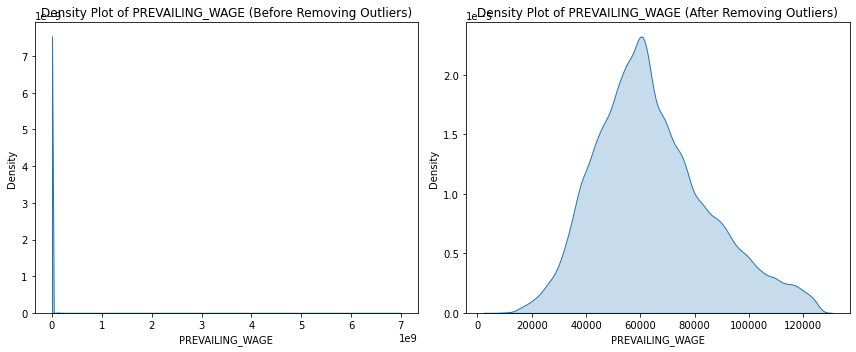

In [36]:
# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# plot the density plot of 'PREVAILING_WAGE' before removing outliers in the first subplot
sns.kdeplot(df['PREVAILING_WAGE'], shade=True, ax=axs[0])
axs[0].set_xlabel('PREVAILING_WAGE')
axs[0].set_ylabel('Density')
axs[0].set_title('Density Plot of PREVAILING_WAGE (Before Removing Outliers)')

# plot the density plot of 'PREVAILING_WAGE' after removing outliers in the second subplot
sns.kdeplot(df_downsampled['PREVAILING_WAGE'], shade=True, ax=axs[1])
axs[1].set_xlabel('PREVAILING_WAGE')
axs[1].set_ylabel('Density')
axs[1].set_title('Density Plot of PREVAILING_WAGE (After Removing Outliers)')

# add spacing between subplots and display the plot
plt.tight_layout()
plt.show()

In [37]:
df_downsampled.EMPLOYER_NAME = df_downsampled.EMPLOYER_NAME.str.lower()
emp_name = {
   'EMPLOYER_NAME': {
      r"[.\-,);\"'(+/]|(&QUOT;)":'', 
      r'ltd':'limited',
      r'(&amp;)|&':'and',r'(.*gates corporation.*$)':'gates corporation',
      r'corp$':'corporation',
      r'^europeanamerican':'european american',
      r'(.*euromarket designs inc.*$)':'euro market designs inc',
      r'(.*eurofins lancaster laboratories*$)':'eurofins lancaster laboratories inc',
      r'^eurocolletion|^eurocollection':'euro collection',
      r'^technosoft':'techno soft',
      r'^healthcare':'health care',
      r'^healthplan':'health plan',
      r'warner university inc':'warner university',
      r'grouppc$':'group pc',
      r'americasinc$':'americas inc'}
}

df_downsampled.replace(emp_name, regex=True, inplace=True)

#Remove rows of the employers with less than 4 application  
cdf_dict = df_downsampled.EMPLOYER_NAME.value_counts().to_dict()
emp_list = [k for k,v in cdf_dict.items() if v<=4]
len(emp_list)
df_downsampled = df_downsampled[~df_downsampled.EMPLOYER_NAME.isin(emp_list)]

C:\Users\parth\AppData\Local\Temp\ipykernel_13444\694304016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_downsampled.EMPLOYER_NAME = df_downsampled.EMPLOYER_NAME.str.lower()
C:\Users\parth\AppData\Local\Temp\ipykernel_13444\694304016.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_downsampled.replace(emp_name, regex=True, inplace=True)


In [38]:
# Feature 3: SOC_NAME
#remove special characters to uniform format
df_downsampled['SOC_NAME']=df_downsampled['SOC_NAME'].str.lower()

soc = {
   'SOC_NAME': {
      r"[*.\-,);\"'(+/]|<font>|</font>|(^[0-9]$)":'', r'&amp|&':' and '}}
    
soc = {
   'SOC_NAME': {
      r'^compute|^computer|^copmuter|^computers|^comuter|^compuer':'computer'}}
      
soc = {
   'SOC_NAME': {
      r'induatrial':'industrial'}}
soc = {
   'SOC_NAME': {      
      r'engineers|enginers|engineering|engineerarquitects|enigneers|engineerarchitect':'engineer'}}
      
soc = {
   'SOC_NAME': {
      r'analysta|analystt|analyhsts|analys$|anlysts':'analyst'}}
      
soc = {
   'SOC_NAME': {
      r'sofware|softare|softwware':'software',
      r'^all other|all other$|other$|all othter$':''}}
      
soc = {
   'SOC_NAME': {
      r'systemanalyst':'system analyst',
      r'hardward':'hardware',
      r'aplications|applications|appllications|applicationsssss':'application'}}
      
soc = {
   'SOC_NAME': {
      r'dvelopers|developers|developpers': 'developer',
      r'datebase':'database',
      r'maanger|mangers|managerse|managers':'manager', 
      r'sysems|systems':'system'}} 
      
       
soc = {
   'SOC_NAME': {
      r'technicans|technicians':'technician',
      r'deisgners|designers':'designer',
      r'operations':'operation'}}
      
    
soc = {
   'SOC_NAME': {
      r'except computer non|except computer|except compuer':'', 
      r'software application developer|application developer':'software developer application'}                    
}


df_downsampled.replace(soc, regex=True, inplace=True)
df_downsampled=df_downsampled[~df_downsampled['SOC_NAME'].str.contains('^[0-9]*$',na=False)]

In [39]:
# create a dictionary for mapping job titles to their standardized format
job_title_mapping = {
    'all other': '',
    'analyst': 'analyst',
    'application developer': 'software developer application',
    'computer': 'computer',
    'database': 'database',
    'designer': 'designer',
    'developer': 'developer',
    'engineer': 'engineer',
    'hardware': 'hardware',
    'industrial': 'industrial',
    'manager': 'manager',
    'operation': 'operation',
    'software': 'software',
    'system': 'system',
    'system analyst': 'system analyst',
    'technician': 'technician'
}

# replace variations of job titles with their standardized format
df_downsampled['SOC_NAME'] = df_downsampled['SOC_NAME'].str.lower().replace(job_title_mapping, regex=False)

# remove any rows where the job title is just a number
#df_downsampled = df_downsampled[~df_downsampled['SOC_NAME'].str.isnumeric()]


In [40]:
len(df_downsampled['SOC_NAME'].unique())

559

In [41]:
df_downsampled['PREVAILING_WAGE'] = np.where((df_downsampled['PREVAILING_WAGE'] > 0) & (df_downsampled['PREVAILING_WAGE']<= 30000), 'low', np.where((df_downsampled['PREVAILING_WAGE'] > 30000) & (df_downsampled['PREVAILING_WAGE']<= 60000), 'medium', 'high'))

In [42]:
len(df_downsampled['PREVAILING_WAGE'].unique())

3

In [43]:
df_downsampled['FULL_TIME_POSITION']=df_downsampled['FULL_TIME_POSITION'].replace({'Y': 1, 'N': 0})
df_downsampled.FULL_TIME_POSITION.astype(int)

1227785    1
1336620    1
2183048    1
311274     1
2571038    1
          ..
3002354    1
3002355    1
3002357    1
3002365    1
3002368    1
Name: FULL_TIME_POSITION, Length: 95538, dtype: int32

In [44]:
df_downsampled[['EMPLOYER_NAME','SOC_NAME','WORKSITE','YEAR']] = df_downsampled[['EMPLOYER_NAME','SOC_NAME','WORKSITE','YEAR']].apply(lambda x: x.astype('category'))


In [45]:
categorical_col=['PREVAILING_WAGE','EMPLOYER_NAME','SOC_NAME','WORKSITE','YEAR']
dummy_df = pd.get_dummies(df_downsampled[categorical_col])
df_downsampled =pd.concat([df_downsampled,dummy_df],axis=1)
df_downsampled =df_downsampled.drop(categorical_col,axis=1)

In [46]:
df_downsampled

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE_high,PREVAILING_WAGE_low,PREVAILING_WAGE_medium,EMPLOYER_NAME_161 hudson cafe llc,EMPLOYER_NAME_18 fools llc,EMPLOYER_NAME_18|8 solutions inc,EMPLOYER_NAME_22nd century technologies inc,EMPLOYER_NAME_360i llc,...,"WORKSITE_YPSILANTI, MICHIGAN","WORKSITE_YUMA, ARIZONA","WORKSITE_ZACHARY, LOUISIANA","WORKSITE_ZEPHYRHILLS, FLORIDA",YEAR_2011.0,YEAR_2012.0,YEAR_2013.0,YEAR_2014.0,YEAR_2015.0,YEAR_2016.0
1227785,CERTIFIED,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1336620,CERTIFIED,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2183048,CERTIFIED,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
311274,CERTIFIED,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2571038,CERTIFIED,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002354,DENIED,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3002355,DENIED,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3002357,DENIED,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3002365,DENIED,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95538 entries, 1227785 to 3002368
Columns: 9088 entries, CASE_STATUS to YEAR_2016.0
dtypes: int64(1), object(1), uint8(9086)
memory usage: 830.0+ MB


In [48]:
from sklearn import preprocessing
y = df_downsampled['CASE_STATUS']
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y)
df_downsampled['CASE_STATUS'] = y_encoded
x_features = df_downsampled.drop('CASE_STATUS',1)
y_encoded

C:\Users\parth\AppData\Local\Temp\ipykernel_13444\3446964359.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_features = df_downsampled.drop('CASE_STATUS',1)


array([0, 0, 0, ..., 1, 1, 1])

In [49]:
x_features.dropna(axis = 'columns')

,FULL_TIME_POSITION,PREVAILING_WAGE_high,PREVAILING_WAGE_low,PREVAILING_WAGE_medium,EMPLOYER_NAME_161 hudson cafe llc,EMPLOYER_NAME_18 fools llc,EMPLOYER_NAME_18|8 solutions inc,EMPLOYER_NAME_22nd century technologies inc,EMPLOYER_NAME_360i llc,EMPLOYER_NAME_3a soft inc,...,"WORKSITE_YPSILANTI, MICHIGAN","WORKSITE_YUMA, ARIZONA","WORKSITE_ZACHARY, LOUISIANA","WORKSITE_ZEPHYRHILLS, FLORIDA",YEAR_2011.0,YEAR_2012.0,YEAR_2013.0,YEAR_2014.0,YEAR_2015.0,YEAR_2016.0
1227785,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1336620,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2183048,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
311274,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2571038,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002354,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3002355,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3002357,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3002365,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_features, y_encoded, 
                                                    test_size=0.3)

In [52]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Model 1 - Logistic Regression  

In [54]:
clf=LogisticRegression(penalty = 'l2', solver = 'newton-cg')
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_pred,y_test, multi_class = 'ovr'))

Accuracy:  0.7494243248900984 , Precision:  0.7494243248900984 , Recall:  0.7494243248900984 , F1:  0.7494243248900984 , AUC Score:  0.7201068910844785


## Tuning parameters for the models

In [55]:
clf=LogisticRegression(penalty = 'l1', solver = 'liblinear')
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_pred,y_test, multi_class = 'ovr'))

Accuracy:  0.7448538134114856 , Precision:  0.7448538134114856 , Recall:  0.7448538134114856 , F1:  0.7448538134114856 , AUC Score:  0.7174189457020024


In [58]:
clf=LogisticRegression(penalty = 'l2', solver = 'sag')
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_pred,y_test, multi_class = 'ovr'))

Accuracy:  0.7493894354894983 , Precision:  0.7493894354894983 , Recall:  0.7493894354894983 , F1:  0.7493894354894982 , AUC Score:  0.7200600341705302


# Model 2 - Decision Trees

In [62]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy', max_depth=10, ccp_alpha = 0.1) 
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_test,y_pred, multi_class = 'ovr'))

Accuracy:  0.6844253715721164 , Precision:  0.6844253715721164 , Recall:  0.6844253715721164 , F1:  0.6844253715721164 , AUC Score:  0.5


## Tuning Parameters for the models

In [63]:
clf=DecisionTreeClassifier(criterion='gini', max_depth=10, ccp_alpha = 0.1) 
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_test,y_pred, multi_class = 'ovr'))

Accuracy:  0.6844253715721164 , Precision:  0.6844253715721164 , Recall:  0.6844253715721164 , F1:  0.6844253715721164 , AUC Score:  0.5


In [64]:
clf=DecisionTreeClassifier(criterion='gini', max_depth=200, ccp_alpha = 0.1) 
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_test,y_pred, multi_class = 'ovr'))

Accuracy:  0.6844253715721164 , Precision:  0.6844253715721164 , Recall:  0.6844253715721164 , F1:  0.6844253715721164 , AUC Score:  0.5


In [65]:
clf=DecisionTreeClassifier(criterion='gini', max_depth=200, ccp_alpha = 0.05) 
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_test,y_pred, multi_class = 'ovr'))

Accuracy:  0.6844253715721164 , Precision:  0.6844253715721164 , Recall:  0.6844253715721164 , F1:  0.6844253715721164 , AUC Score:  0.5


# Model 3 - SVM

In [66]:
from sklearn.svm import SVC

clf=SVC(kernel='rbf', C=0.5, max_iter=1000)            
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_test,y_pred, multi_class = 'ovr'))

C:\Users\parth\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy:  0.6415462982345963 , Precision:  0.6415462982345963 , Recall:  0.6415462982345963 , F1:  0.6415462982345963 , AUC Score:  0.49316338225272677


## Tuning Parameters for the models

In [67]:
clf=SVC(kernel='rbf', C=0.5, max_iter=10)            
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_test,y_pred, multi_class = 'ovr'))

C:\Users\parth\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy:  0.4012978857023236 , Precision:  0.4012978857023236 , Recall:  0.4012978857023236 , F1:  0.4012978857023236 , AUC Score:  0.46240711955675906


In [68]:
clf=SVC(kernel='rbf', C=0.01, max_iter=100)            
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_test,y_pred, multi_class = 'ovr'))

C:\Users\parth\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy:  0.6424883120507989 , Precision:  0.6424883120507989 , Recall:  0.6424883120507989 , F1:  0.6424883120507989 , AUC Score:  0.4810116128504307


In [69]:
clf=SVC(kernel='sigmoid', C=0.01, max_iter=100)            
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_test,y_pred, multi_class = 'ovr'))

C:\Users\parth\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy:  0.4366408485102226 , Precision:  0.4366408485102226 , Recall:  0.4366408485102226 , F1:  0.4366408485102226 , AUC Score:  0.506309736934941


# Model 4 - KNN

In [70]:
from sklearn import neighbors
kvalues = [161,181,201,221,241,261]
for k in kvalues: 
    clf=neighbors.KNeighborsClassifier(k, metric='euclidean')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_test,y_pred, multi_class = 'ovr'))

Accuracy:  0.6973344497941525 , Precision:  0.6973344497941525 , Recall:  0.6973344497941525 , F1:  0.6973344497941525 , AUC Score:  0.5281393832861149
Accuracy:  0.6955550903635476 , Precision:  0.6955550903635476 , Recall:  0.6955550903635476 , F1:  0.6955550903635476 , AUC Score:  0.5238008019409166
Accuracy:  0.6947875235503455 , Precision:  0.6947875235503455 , Recall:  0.6947875235503455 , F1:  0.6947875235503455 , AUC Score:  0.521839883858815
Accuracy:  0.6929034959179401 , Precision:  0.6929034959179401 , Recall:  0.6929034959179401 , F1:  0.6929034959179401 , AUC Score:  0.5183185701033836
Accuracy:  0.692484823110739 , Precision:  0.692484823110739 , Recall:  0.692484823110739 , F1:  0.692484823110739 , AUC Score:  0.5169700257442461
Accuracy:  0.6913683622915359 , Precision:  0.6913683622915359 , Recall:  0.6913683622915359 , F1:  0.6913683622915359 , AUC Score:  0.5145754803153694


## Parameter Tuning for the model

In [ ]:
# kvalues = [161,181,201,221,241,261]
# for k in kvalues: 
#     clf=neighbors.KNeighborsClassifier(k, metric='manhattan')
#     clf.fit(x_train, y_train)
#     y_pred = clf.predict(x_test)
#     print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
#          ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_test,y_pred, multi_class = 'ovr'))

# Model 5 - Neural Networks

In [54]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='sgd',activation = "relu",learning_rate_init = 0.1,alpha=0.1,hidden_layer_sizes=(20))
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_test,y_pred, multi_class = 'ovr'))

C:\Users\parth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy:  0.7256297536808317 , Precision:  0.7256297536808317 , Recall:  0.7256297536808317 , F1:  0.7256297536808317 , AUC Score:  0.6665570218101965


##    Parameter Tuning for the model 

In [55]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier()
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_test,y_pred, multi_class = 'ovr'))

C:\Users\parth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy:  0.7320145139906497 , Precision:  0.7320145139906497 , Recall:  0.7320145139906497 , F1:  0.7320145139906497 , AUC Score:  0.6733819490947516


# Model 6 - Naive Bayes

In [56]:
from sklearn.naive_bayes import CategoricalNB,BernoulliNB,ComplementNB,MultinomialNB,GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_test,y_pred, multi_class = 'ovr'))

Accuracy:  0.4380364245342265 , Precision:  0.4380364245342265 , Recall:  0.4380364245342265 , F1:  0.4380364245342264 , AUC Score:  0.5550489024592531


In [59]:
clf = MultinomialNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_test,y_pred, multi_class = 'ovr'))

Accuracy:  0.7348754448398577 , Precision:  0.7348754448398577 , Recall:  0.7348754448398577 , F1:  0.7348754448398577 , AUC Score:  0.6512611291662487


In [60]:
clf = ComplementNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_test,y_pred, multi_class = 'ovr'))

Accuracy:  0.7007885004535622 , Precision:  0.7007885004535622 , Recall:  0.7007885004535622 , F1:  0.7007885004535622 , AUC Score:  0.6739512490810311


In [61]:
clf = BernoulliNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro', ),
         ', Recall: ', recall_score(y_test, y_pred, average='micro', ), ', F1: ', f1_score(y_test, y_pred, average='micro'), ', AUC Score: ', roc_auc_score(y_test,y_pred, multi_class = 'ovr'))

Accuracy:  0.7305840485660456 , Precision:  0.7305840485660456 , Recall:  0.7305840485660456 , F1:  0.7305840485660456 , AUC Score:  0.6496973290001004
